# A New Hotel in THE BRONX!?! 

## Introduction 

Where to locate a new Hotel in the BRONX!?!

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/1650_Grand_Concourse.jpg/1920px-1650_Grand_Concourse.jpg width="500" align="left">



## Business Problem

A Customer just saw the De Niro Movie ` A Bronx Tale `...

<img src=https://wonderingheights.com/wp-content/uploads/2019/10/fullsizeoutput_1bdd.jpeg width="500" align="left">


...and came to me asking suggestion about where it is better to locate a new hotel.


There are lots of variables to consider when trying to define the best location for a new Hotel in NYC. For this study we considered the following as priority:

- lack of competitors

- distance to Time square

Given the fact that there is a new policy that facilitate renting of building in Bronx to make the district growth we assume that rent in this case is not a variable to consider.

#### Data Collection and Methodology 
We will need:
 - a dataset on New York city neighborhoods and hotel data from the FourSquare location platform.
 - Calculate distance from each Bronx neighborhood to Manhattan.
 - Distance + Hotel Data clustered to determine the ideal neighborhood (Kmean will be used)
 - Location data and hotel data will be obtained from the website https://geo.nyu.edu/catalog/nyu_2451_34572 and the FourSquare database respectively.

#### Import libraries 

In [157]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

! pip install geopy 
from geopy.geocoders import Nominatim # convert an address into longitude and latitude values 

import json # library to handle JSON files 

import requests # library to handle request 
from pandas.io.json import json_normalize # Transform JSON file into a pandas dataframe 

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means for clustering 
from sklearn.cluster import KMeans

! pip install folium 
import folium # Map rendering library 
! pip install RISE

print('All libraries and modules installed')

All libraries and modules installed


#### Download and Explore the dataset 
We will download and explore the dataset from both the borough of Manhattan and Bronx. The New York neighborhood dataset is already located on IBM storage so we will download it from there using !wget command. 

In [158]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


Next we will load and explore the data 

In [159]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

All the neighborhood data is in the 'feature' key so lets assign it a new variable neighborhood_data  

In [160]:
neighborhood_data = newyork_data['features']
neighborhood_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe

In [161]:
#define the dataframe columns 
columns_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

# Create dataframe with empthy columns
neighborhoods = pd.DataFrame(columns = columns_names)

for data in neighborhood_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough, 
                                           'Neighborhood':neighborhood_name,
                                           'Latitude':neighborhood_lat, 
                                            'Longitude':neighborhood_lon}, ignore_index=True)  
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [65]:
print('Boroughs in the NYC:',len(neighborhoods['Borough'].unique()))
print ('Data dimension:', neighborhoods.shape)

Boroughs in the NYC: 5
Data dimension: (612, 4)


#### Filter dataframe to get Bronx neighborhoods

In [162]:
Bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop = True)
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Create a map of New York city with Bronx neighborhoods imposed on top 

In [163]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [164]:
address = '234 W 42nd St, New York, NY 10036'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
man_lat = location.latitude
man_long = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(man_lat, man_long))

The geograpical coordinate of Manhattan are 40.75668515, -73.98926649582987.


#### We will now create a map of New York city with Bronx neighborhoods superimposed on top 

In [165]:
# create map of Bronx using latitude and longitude values
map_Bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through Queens_data and add neighborhood markers to map
for lat, lng, label in zip(Bronx_data['Latitude'], Bronx_data['Longitude'], Bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=7,
        parse_html=False).add_to(map_Bronx) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_Bronx)
    
map_Bronx

The above map shows the Bronx neighborhoods that are closest to Manhattan.The neighborhoods in Bronx are represented by the blue dots and the red dot represents Time Square in Mid-town Manhattan. Midtown Manhattan is generally where most business travelers and tourist start there visit so it only makes sense to use this location as part of our distance calculation. To determine which neighborhood in Bronx is closer to Manhattan, we will use the location data to calculate the distance between mid-town Manhattan and the Bronx neighborhoods. But before we do that let take a look at where hotels are located in Bronx relative to Manhattan.  

#### Create a map of hotels in Bronx 
In order to display the hotels in Bronx, we need to access them from the FourSquare database. We will access all the venues in the Bronx neighborhoods then filter the hotel data. We will start by inputting our FourSquare credentials

In [74]:
CLIENT_ID = 'WXY1ZKO0DIRWTH3QTCKKS2ISR0YVQWQEYKTCDCEQAQ3AEBKD' # your Foursquare ID
CLIENT_SECRET = 'VI2A1VSNTNXLHPRIPEXTQT23DX5USFXZNC4R2U2JKRNT2HJ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WXY1ZKO0DIRWTH3QTCKKS2ISR0YVQWQEYKTCDCEQAQ3AEBKD
CLIENT_SECRET:VI2A1VSNTNXLHPRIPEXTQT23DX5USFXZNC4R2U2JKRNT2HJ4


Let create a function to get all venues in Bronx 

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call the getNearbyVenues function and store the results in Bronx_venues 

In [77]:
# Call the getNearbyVenues function and store the results in Bronx_venues
Bronx_venues = getNearbyVenues(names=Bronx_data['Neighborhood'],
                                   latitudes=Bronx_data['Latitude'],
                                   longitudes=Bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights
Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square

Display Bronx_venues dataframe head and dimension   

In [78]:
print(Bronx_venues.shape)
Bronx_venues.head()

(2442, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


We will now filter the hotel data from the Bronx_venue dataframe 

In [79]:
Hotel_data = Bronx_venues[Bronx_venues['Venue Category'] == 'Hotel'].reset_index(drop = True)
print(Hotel_data.shape)
Hotel_data.head()

(4, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Farms,40.839475,-73.877745,Howard Johnson,40.839749,-73.881212,Hotel
1,Concourse Village,40.824780,-73.915847,Days Inn Bronx-Yankee Stadium,40.827092,-73.912007,Hotel
2,West Farms,40.839475,-73.877745,Howard Johnson,40.839749,-73.881212,Hotel
3,Concourse Village,40.824780,-73.915847,Days Inn Bronx-Yankee Stadium,40.827092,-73.912007,Hotel


Create map of hotels in Bronx 

In [81]:
# create map of Bronx using latitude and longitude values
map_Bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through Queens_data and add neighborhood markers to map
for lat, lng, label in zip(Hotel_data['Venue Latitude'], Hotel_data['Venue Longitude'], Hotel_data['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='green',
        fill_opacity=7,
        parse_html=False).add_to(map_Bronx) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_Bronx)
    
map_Bronx

Interestingly the map also shows that most of the hotels in Bronx exist in neighborhoods that are close to Manhattan. Lets view the number of hotels in each neigborhood on a bargraph.

In [82]:
# Use one hot encoding on the Venue Category 
Hotel_onehot = pd.get_dummies(Hotel_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hotel_onehot.insert(0,'Neighborhood', Hotel_data['Neighborhood'], True ) 
Hotel_onehot.head()

,Neighborhood,Hotel
0,West Farms,1
1,Concourse Village,1
2,West Farms,1
3,Concourse Village,1


In [83]:
# Sum up the hotels in each neighborhood 
Hotel_df = Hotel_onehot.groupby('Neighborhood').sum()
Hotel_df

,Hotel
Neighborhood,
Concourse Village,2
West Farms,2


Quick look at the descriptive statistic data

Import matplotlib for plotting 

In [85]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


Plot bar-graph of hotels vs neighborhood  

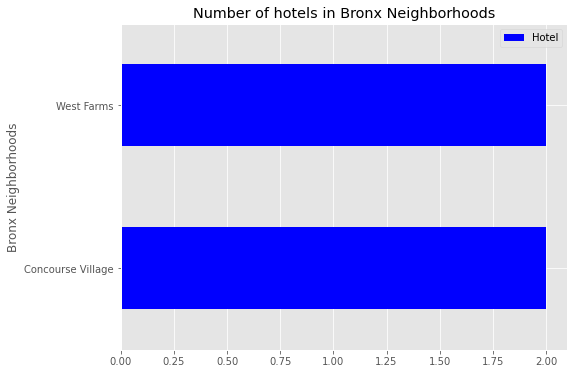

In [86]:
Hotel_df.plot(kind='barh', figsize=(8, 6), color = 'blue')

plt.title('Number of hotels in Bronx Neighborhoods')
plt.ylabel('Bronx Neighborhoods')

plt.show()

So both the above bar graph and previous maps shows us that the Bronx neighborhoods that are closest to Manhattan also have the most hotels. One example is the Long Island City neighborhood with 8 total hotels.This visual insite helps us to rule out most neighborhoods close to Manhattan has potential candidates. The visualization tools used above gave us some value insite into the data but further analysis is needed to determine the ideal neigborhood. Remember the goal is to find the Queens neighborhood that is closest to Manhattan with least amount of hotels. Now that we have the number of hotels in each neigborhood, we need to calculate the distance between the Queens neighborhoods and Mid-town Manhattan.The results will then be added our existing feature set to be clustered.     

#### Calculate the distance between the Manhattan and Bronx neigborhoods 

To calculate the distance between the Bronx neighborhoods and mid-town Manhattan I found a function on the internet that does this using the haversine formula. Let import this function and test it. 

In [87]:
pip install git+https://github.com/nathanrooy/spatial-analysis # install and import the haversine function 

  Cloning https://github.com/nathanrooy/spatial-analysis to /tmp/wsuser/pip-req-build-3a7gf7wz
  Running command git clone -q https://github.com/nathanrooy/spatial-analysis /tmp/wsuser/pip-req-build-3a7gf7wz
  Created wheel for spatial: filename=spatial-0.0.1-py3-none-any.whl size=15769 sha256=737cbd9638db0bf7c77172b4805dbd281fe556b4d1eb29562ef0c9f5fc2c96fb
  Stored in directory: /tmp/wsuser/pip-ephem-wheel-cache-kekcmarb/wheels/0b/2a/7c/3a4728653ce163f9153edb3d87fc4e2b6579e019ec154a500a
Successfully built spatial
Note: you may need to restart the kernel to use updated packages.


Import haversine function and test 

In [88]:
 from spatial import haversine
>>> p1 = [man_long, man_lat]     # p1=[longitude_1, latitude_1] of manhattan
>>> p2 = [longitude, latitude]     # p2=[longitude_2, latitude_2] of neighborhoods in Queens 
>>> haversine(p1, p2).mi()             # miles

8.493795798893368

As you can see given the longitude and latitude of two points p1 and p2 you can calculate the distance between them using this function. Now let apply this to all the neighborhoods in Queens and mid-town Manhattan. We will loop through Queen_data and calculate the distance from each neighborhood to mid-town Manhattan.    

In [89]:
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


I created a function called getDistance that will accept the longitude and latitude values of each neighborhood and returns the distance between each neighborhood and mid-town Manhattan. 

In [90]:
# Function to calculate the distance between each Bronx neighborhood and Manhattan 
def getDistance(names,longitude,latitude):
    dist_list=[]
    for name, lat, lng in zip(names, latitude, longitude):
        print(name)
        p1 = [man_long, man_lat] # longitude and latitude of mid-town Manhattan 
        p2 = [lng, lat]   # Longitude and latitude of Bronx neighborhoods 
        distance = haversine(p1, p2).mi()   # distance from Queens neighborhood to mid-town Manhattan 
        dist_list.append(distance)     # add distances to distance list 
    return(dist_list)
        

Now let call the detDistance function and return the result list to distance_list 

In [91]:
distance_list = getDistance(names=Bronx_data['Neighborhood'],
                                   latitude=Bronx_data['Latitude'],
                                   longitude=Bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights
Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square

Let view the distance_list 

In [92]:
distance_list[0:10]

[12.087596570542821,
 11.638040296907358,
 12.370582446178776,
 10.536738931708916,
 10.098761417108147,
 9.748183652111909,
 11.677036183464912,
 10.11792482512575,
 11.015052047577685,
 11.061393843100067]

Let verify that all rows in Bronx_data was processed by comparing the distance_list and Queen_data dimension. 

In [93]:
print(len(distance_list))
print(Bronx_data.shape)

104
(104, 4)


Now lets add distance_list to our Bronx_data dataframe

In [95]:
# Add distance_list to Bronx_data 
Bronx_data.insert(4, 'Distance', distance_list)

In [96]:
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance
0,Bronx,Wakefield,40.894705,-73.847201,12.087597
1,Bronx,Co-op City,40.874294,-73.829939,11.638040
2,Bronx,Eastchester,40.887556,-73.827806,12.370582
3,Bronx,Fieldston,40.895437,-73.905643,10.536739
4,Bronx,Riverdale,40.890834,-73.912585,10.098761


Let also merge the two dataframes Bronx_data and Hotel_df 

In [97]:
#Reset Hotel_df index before merging with Queen_data 
Hotel_df.reset_index()

,Neighborhood,Hotel
0,Concourse Village,2
1,West Farms,2


In [98]:
# Add the hotel column to Bronx_data by merging Bronx_data and Hotel_df using a left join
Bronx_data = pd.merge(Bronx_data, Hotel_df, how='left', on=['Neighborhood', 'Neighborhood'])

In [99]:
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Bronx,Wakefield,40.894705,-73.847201,12.087597,NaN
1,Bronx,Co-op City,40.874294,-73.829939,11.638040,NaN
2,Bronx,Eastchester,40.887556,-73.827806,12.370582,NaN
3,Bronx,Fieldston,40.895437,-73.905643,10.536739,NaN
4,Bronx,Riverdale,40.890834,-73.912585,10.098761,NaN


In [113]:
# Replace all NAN value in the hotels column to zero 
Bronx_data['Hotel'] = Bronx_data['Hotel'].fillna(0)
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Bronx,Wakefield,40.894705,-73.847201,12.087597,0.0
1,Bronx,Co-op City,40.874294,-73.829939,11.638040,0.0
2,Bronx,Eastchester,40.887556,-73.827806,12.370582,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10.536739,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10.098761,0.0


We now have both the distance data and the hotel data added to Bronx_data. To determine the ideal neighborhoods we will cluster this data set. 

In [114]:
# Create a copy of the Bronx_data for clustering 
Bronx_group_clustering = Bronx_data.copy()

In [115]:
Bronx_group_clustering.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Bronx,Wakefield,40.894705,-73.847201,12.087597,0.0
1,Bronx,Co-op City,40.874294,-73.829939,11.638040,0.0
2,Bronx,Eastchester,40.887556,-73.827806,12.370582,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10.536739,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10.098761,0.0


In [116]:
# Drop catagorical data before clustering 
Bronx_group_clustering = Bronx_group_clustering.drop(['Borough', 'Neighborhood'], axis = 1)

In [117]:
Bronx_group_clustering.head()

,Latitude,Longitude,Distance,Hotel
0,40.894705,-73.847201,12.087597,0.0
1,40.874294,-73.829939,11.638040,0.0
2,40.887556,-73.827806,12.370582,0.0
3,40.895437,-73.905643,10.536739,0.0
4,40.890834,-73.912585,10.098761,0.0


Let normal the data 

In [118]:
from sklearn.preprocessing import StandardScaler

X = Bronx_group_clustering.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[0:10]

array([[ 1.63799636,  0.76583104,  1.61426976, -0.20891739],
       [ 0.8819912 ,  1.26959015,  1.37564493, -0.20891739],
       [ 1.37318509,  1.33182998,  1.76447889, -0.20891739],
       [ 1.66511828, -0.9397494 ,  0.79107328, -0.20891739],
       [ 1.49462962, -1.1423708 ,  0.55859446, -0.20891739],
       [ 1.15582812, -0.85731569,  0.3725075 , -0.20891739],
       [ 1.77013108,  0.17880862,  1.39634398, -0.20891739],
       [ 0.99051449, -0.17361212,  0.56876641, -0.20891739],
       [ 1.1318085 ,  0.46681322,  1.04496227, -0.20891739],
       [ 0.60656502,  1.09861528,  1.06956053,  2.07817824]])

In [119]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bronx_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 1, 1, 1, 4, 1, 4, 4], dtype=int32)

In [120]:
Bronx_group_clustering.insert(4,'Cluster Labels', kmeans.labels_)

In [121]:
Bronx_group_clustering.head()

,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,40.894705,-73.847201,12.087597,0.0,4
1,40.874294,-73.829939,11.638040,0.0,4
2,40.887556,-73.827806,12.370582,0.0,4
3,40.895437,-73.905643,10.536739,0.0,1
4,40.890834,-73.912585,10.098761,0.0,1


Let group the clusters and take the mean of each one. 

In [123]:
Bronx_group_clustering.groupby('Cluster Labels').mean()

,Latitude,Longitude,Distance,Hotel
Cluster Labels,,,,
0,40.841023,-73.877767,8.396236,0.000000
1,40.858996,-73.861744,9.989502,0.029412
2,40.857413,-73.854756,9.895581,8.000000
3,40.824576,-73.909526,6.346082,0.125000
4,40.880547,-73.843859,11.614675,0.368421


In [124]:
# add clustering labels to Bronx_data 
Bronx_data.insert(6, 'Cluster Labels', kmeans.labels_)

In [125]:
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Bronx,Wakefield,40.894705,-73.847201,12.087597,0.0,4
1,Bronx,Co-op City,40.874294,-73.829939,11.638040,0.0,4
2,Bronx,Eastchester,40.887556,-73.827806,12.370582,0.0,4
3,Bronx,Fieldston,40.895437,-73.905643,10.536739,0.0,1
4,Bronx,Riverdale,40.890834,-73.912585,10.098761,0.0,1


#### Lets examine the clusters 

#### Cluster 0

In [126]:
Bronx_data.loc[Bronx_data['Cluster Labels'] == 0, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
13,Bronx,University Heights,40.855727,-73.910416,7.989608,0.0,0
15,Bronx,Fordham,40.860997,-73.896427,8.690056,0.0,0
16,Bronx,East Tremont,40.842696,-73.887356,7.983010,0.0,0
17,Bronx,West Farms,40.839475,-73.877745,8.169841,0.0,0
25,Bronx,Soundview,40.821012,-73.865746,7.842611,0.0,0
26,Bronx,Clason Point,40.806551,-73.854144,7.864209,0.0,0
29,Bronx,Parkchester,40.837938,-73.856003,8.950059,0.0,0
31,Bronx,Van Nest,40.843608,-73.866299,8.799720,0.0,0
33,Bronx,Belmont,40.857277,-73.888452,8.723740,0.0,0
39,Bronx,Castle Hill,40.819014,-73.848027,8.552075,0.0,0


Cluster-0 has the furthest neighorhoods to Manhattan with an average of 0.06 hotels.The average distance for neighborhoods in this cluster is 14.14 miles. This makes them not very good candiates

#### Cluster 1

In [127]:
Bronx_data.loc[Bronx_data['Cluster Labels'] == 1, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
3,Bronx,Fieldston,40.895437,-73.905643,10.536739,0.0,1
4,Bronx,Riverdale,40.890834,-73.912585,10.098761,0.0,1
5,Bronx,Kingsbridge,40.881687,-73.902818,9.748184,0.0,1
7,Bronx,Norwood,40.877224,-73.879391,10.117925,0.0,1
12,Bronx,Bedford Park,40.870185,-73.885512,9.536006,0.0,1
27,Bronx,Throgs Neck,40.815109,-73.816350,9.905833,0.0,1
28,Bronx,Country Club,40.844246,-73.824099,10.546488,0.0,1
30,Bronx,Westchester Square,40.840619,-73.842194,9.633630,0.0,1
32,Bronx,Morris Park,40.847549,-73.850402,9.600173,0.0,1
34,Bronx,Spuyten Duyvil,40.881395,-73.917190,9.404751,0.0,1


Cluster-1 has the second furthest neighorhoods to Manhattan with average of 10.13 miles. It also has an average of 0.08 hotels. This makes them not very good candiates

#### Cluster 2

In [128]:
Bronx_data.loc[Bronx_data['Cluster Labels'] == 2, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
10,Bronx,Pelham Parkway,40.857413,-73.854756,9.895581,8.0,2


Cluster-2 has the second closest neighorhoods to Manhattan with an average of 3.62 miles and second most hotels with an average of 0.4. This makes them good candiates. Looking deeper into the cluster we can narrow our choices down to neighborhood with no hotels such as Astoria, Woodside, Steinway, Ravenswood, Astoria Heights,Hunts point and Sunyside Gardens.

#### Cluster 3

In [129]:
Bronx_data.loc[Bronx_data['Cluster Labels'] == 3, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
14,Bronx,Morris Heights,40.847898,-73.919672,7.277816,0.0,3
18,Bronx,High Bridge,40.836623,-73.926102,6.435914,0.0,3
19,Bronx,Melrose,40.819754,-73.909422,6.036193,1.0,3
20,Bronx,Mott Haven,40.806239,-73.916100,5.135713,0.0,3
21,Bronx,Port Morris,40.801664,-73.913221,5.048522,0.0,3
22,Bronx,Longwood,40.815099,-73.895788,6.340664,0.0,3
23,Bronx,Hunts Point,40.809730,-73.883315,6.645106,0.0,3
24,Bronx,Morrisania,40.823592,-73.901506,6.515061,0.0,3
42,Bronx,Concourse,40.834284,-73.915589,6.602884,0.0,3
45,Bronx,Claremont Village,40.831428,-73.901199,6.920300,0.0,3


Cluster-3 has the third furthest neighorhoods to Manhattan with an average of 0.12 hotels.The average distance for neighborhoods in this cluster is 6.13 miles. This makes them not good candiates

#### Cluster 4

In [130]:
Bronx_data.loc[Bronx_data['Cluster Labels'] == 4, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Bronx,Wakefield,40.894705,-73.847201,12.087597,0.0,4
1,Bronx,Co-op City,40.874294,-73.829939,11.638040,0.0,4
2,Bronx,Eastchester,40.887556,-73.827806,12.370582,0.0,4
6,Bronx,Woodlawn,40.898273,-73.867315,11.677036,0.0,4
8,Bronx,Williamsbridge,40.881039,-73.857446,11.015052,0.0,4
9,Bronx,Baychester,40.866858,-73.835798,11.061394,2.0,4
11,Bronx,City Island,40.847247,-73.786488,12.313898,1.0,4
35,Bronx,North Riverdale,40.908543,-73.904531,11.389134,0.0,4
44,Bronx,Edenwald,40.884561,-73.848083,11.513430,0.0,4
52,Bronx,Wakefield,40.894705,-73.847201,12.087597,0.0,4


Cluster-4 has the closest neighorhoods to Manhattan. It however has the most hotels among all the Bronx neighhorhoods making it a very poor candidate. 

#### Finally let visualize the clusters 

In [131]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bronx_data['Latitude'], Bronx_data['Longitude'], Bronx_data['Neighborhood'], Bronx_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results and Discussion 

### After carefully analyzing each cluster, it appears that cluster 3 satisfied our condition of neighborhoods closest to Manhattan with the minimum amount of hotels. Looking deeper into cluster 3 we can narrow our choices down to neighborhoods like Port Morris and Mott Haven where the distance to Manhattan is ~5km and no competition is there.

In [153]:
final_List = Bronx_data.loc[Bronx_data['Cluster Labels'] == 3, Bronx_data.columns[[0] + list(range(1, Bronx_data.shape[1]))]]

In [154]:
final_List = final_List.drop(['Latitude', 'Longitude','Cluster Labels'], axis = 1)
final_List = final_List.loc[final_List['Hotel']==0, final_List.columns[[0] + list(range(1, final_List.shape[1]))]]

In [155]:
final_List.sort_values(by='Distance')
#final_List.reset_index(drop = True, inplace = True)
#final_List

,Borough,Neighborhood,Distance,Hotel
21,Bronx,Port Morris,5.048522,0.0
73,Bronx,Port Morris,5.048522,0.0
20,Bronx,Mott Haven,5.135713,0.0
72,Bronx,Mott Haven,5.135713,0.0
71,Bronx,Melrose,6.036193,0.0
46,Bronx,Concourse Village,6.073459,0.0
98,Bronx,Concourse Village,6.073459,0.0
22,Bronx,Longwood,6.340664,0.0
18,Bronx,High Bridge,6.435914,0.0
70,Bronx,High Bridge,6.435914,0.0


## Conclusion 

In summary we determined the Bronx neighborhoods closest to Manhattan with the minimum amount of hotels, by clustering the number of hotels in each Bronx neighborhood and the distances from each Bronx neighborhood to Manhattan. Our anaylsis found that there are 2 Bronx neighborhoods within 5 miles of Manhattan with no hotels. The list is showed above. We recomend to explore Mott Haven and Port Morris